# CNN MODEL TO EXTRACT EMOTIONS FROM IMAGES

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import RMSprop

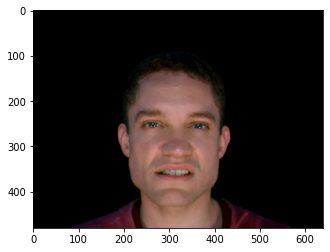

In [2]:
img=image.load_img('/content/drive/MyDrive/Emot/training/Angry/s008-04_img.tif')
plt.imshow(img)

In [3]:
cv2.imread('/content/drive/MyDrive/Emot/training/Angry/s008-04_img.tif')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
cv2.imread('/content/drive/MyDrive/Emot/training/Angry/s008-04_img.tif').shape

(480, 640, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Emot/training',
                                        target_size=(100,100),
                                        batch_size=3,
                                        class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Emot/validation',
                                        target_size=(100,100),
                                        batch_size=3,
                                        class_mode='categorical')

Found 357 images belonging to 7 classes.
Found 357 images belonging to 7 classes.


In [7]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Joy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(7,activation='softmax')
                                  ])

In [10]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])


In [17]:
model_fit=model.fit(train_dataset,epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
119/119 [==============================] - 13s 112ms/step - loss: 1.9476 - accuracy: 0.1541 - val_loss: 1.9296 - val_accuracy: 0.1485
Epoch 2/10
119/119 [==============================] - 13s 112ms/step - loss: 1.9251 - accuracy: 0.1709 - val_loss: 1.9158 - val_accuracy: 0.2269
Epoch 3/10
119/119 [==============================] - 14s 114ms/step - loss: 1.8685 - accuracy: 0.2409 - val_loss: 1.8558 - val_accuracy: 0.3333
Epoch 4/10
119/119 [==============================] - 14s 118ms/step - loss: 1.8312 - accuracy: 0.2941 - val_loss: 1.4480 - val_accuracy: 0.4594
Epoch 5/10
119/119 [==============================] - 13s 111ms/step - loss: 1.4731 - accuracy: 0.4314 - val_loss: 1.4836 - val_accuracy: 0.4202
Epoch 6/10
119/119 [==============================] - 13s 111ms/step - loss: 1.3281 - accuracy: 0.4958 - val_loss: 1.1676 - val_accuracy: 0.6218
Epoch 7/10
119/119 [==============================] - 13s 113ms/step - loss: 1.0383 - accuracy: 0.5966 - val_loss: 0.8519 - val_ac

# Predicting the emotion of new images
### these images have not been used in training

In [30]:
def predicting_images(pics):
  plt.imshow(pics)
  v=image.img_to_array(pics)
  v=np.expand_dims(v,axis=0)
  ima=np.vstack([v])
  value=model.predict(ima)
  h=np.argmax(value)
  if(h==0):
    print("ANGRY")
  elif(h==1):
    print("DISGUST")
  elif(h==2):
    print("FEAR") 
  elif(h==3):
    print("JOY")
  elif(h==4):
    print("NEUTRAL")
  elif(h==5):
    print("SAD")
  elif(h==6):
    print("SURPRISED")       


SURPRISED


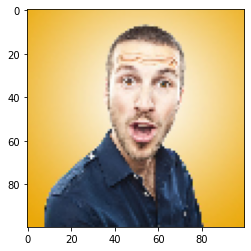

In [33]:
im=image.load_img('/content/testpic2.jpg',target_size=(100,100))
predicting_images(im)


ANGRY


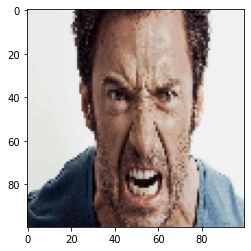

In [36]:
tes=image.load_img('/content/test5.jpg',target_size=(100,100))
predicting_images(tes)

FEAR


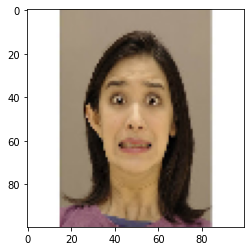

In [37]:
pic=image.load_img('/content/fear-facial-expression.jpg',target_size=(100,100))
predicting_images(pic)

SAD


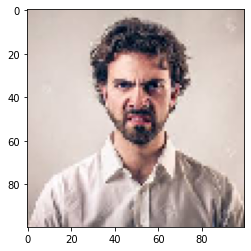

In [38]:
xyz=image.load_img('/content/test4.jpg',target_size=(100,100))
predicting_images(xyz)